In [36]:
import os
import pandas as pd

workdir = '/mnt/f/My Drive/PARPi binder paper/Figures/Fig2_binding_kd/'

data = pd.read_csv(workdir + 'vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/VEL_230408.csv')


In [37]:
# for name in data.columns[2:]:
#     x = data[name][310:410]  - data[data.columns[1]][310:410]
#     y = sum(x)/len(x)
#     data[name] = data[name] - y
# #data.to_csv(workdir + 'vel_corr.csv')

for name in data.columns[1:]:
    y = data[name][170] 
    data[name] = data[name] - y
#data.to_csv(workdir + 'vel_corr.csv')

In [38]:
data.columns

Index(['Unnamed: 0', 'H2O_396', 'vel_0.5_396.5', 'vel_1_397', 'vel_1.5_397.5',
       'vel_2_398', 'vel_2.5_398.5', 'vel_3_399', 'vel_3.5_399.5', 'vel_4_400',
       'vel_4_400_prot_0.5', 'vel_4_400_prot_1', 'vel_4_400_prot_1.5',
       'vel_4_400_prot_2', 'vel_4_400_prot_3', 'vel_4_400_prot_4',
       'vel_4_400_prot_5', 'vel_4_400_prot_6', 'vel_4_400_prot_8',
       'vel_4_400_prot_10', 'vel_4_400_prot_12', 'vel_4_400_prot_16',
       'vel_4_400_prot_20', 'vel_4_400_prot_24', 'vel_4_400_prot_28',
       'vel_4_400_prot_32', 'vel_4_400_prot_36', 'vel_4_400_prot_40',
       'vel_4_400_prot_44', 'vel_4_400_prot_48', 'vel_4_400_prot_52',
       'vel_4_400_prot_56', 'vel_4_400_prot_60'],
      dtype='object')

(-0.05, 0.2)

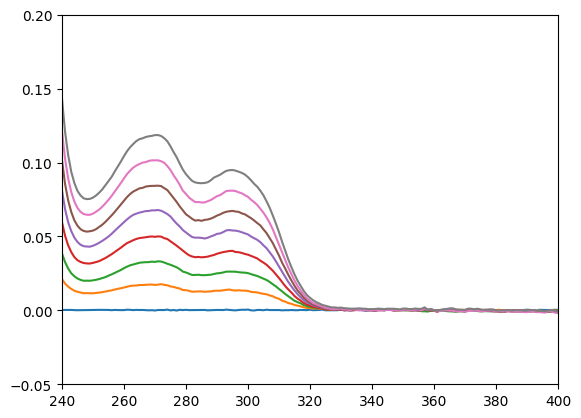

In [39]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for name in data.columns[1:9]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.2])

312
[[0.        ]
 [0.00126103]
 [0.00251889]
 [0.00377358]
 [0.00502513]
 [0.00627353]
 [0.0075188 ]
 [0.00876095]
 [0.01      ]]
0.9993199913956666
-0.00010759434768557036
[4.53991234]


(-0.05, 0.1)

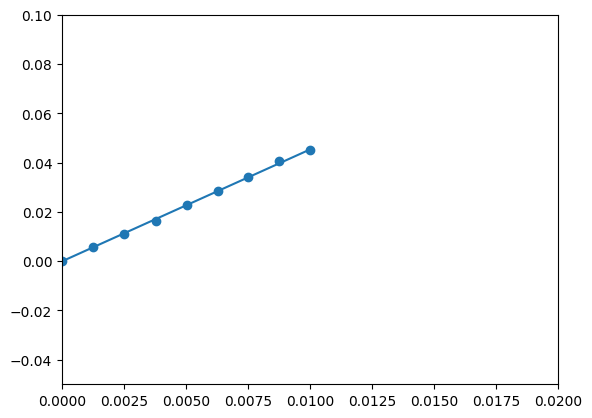

In [40]:

vel_xs = [0/396, 0.5/396.5, 1/397, 1.5/397.5, 2/398, 2.5/398.5, 3/399, 3.5/399.5, 4/400]
vel_ys = data.iloc[312-190, 1:10]


print(data.iloc[312-190, 0])

import numpy as np
from sklearn.linear_model import LinearRegression
vel_xs_re = np.array(vel_xs).reshape(-1, 1)
vel_reg_313 = LinearRegression().fit(vel_xs_re, vel_ys)
print(vel_xs_re)
print(vel_reg_313.score(vel_xs_re, vel_ys))
print(vel_reg_313.intercept_)
print(vel_reg_313.coef_)

fig,ax = plt.subplots()
ax.scatter(vel_xs, vel_ys)
vel_ys_313_pred = np.array([vel_reg_313.predict(np.array(xr).reshape(1, -1)) for xr in vel_xs_re])

ax.plot(vel_xs_re, vel_ys_313_pred)
plt.xlim([0, 0.02])
plt.ylim([-0.05, 0.1])


(-0.05, 0.6)

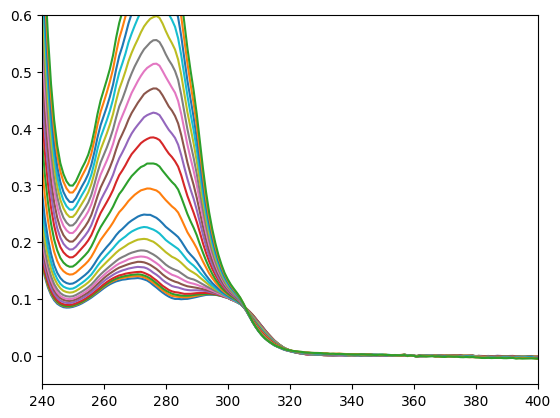

In [41]:
fig,ax = plt.subplots()
for name in data.columns[10:]:
    ax.plot(data[data.columns[0]], data[name])

plt.xlim([240, 400])
plt.ylim([-0.05, 0.3])

In [42]:
prot599 = pd.read_csv(workdir + 'ProteinConc/20230402_prot_conc_599.csv')

prot599.columns

Index(['Wavelength [nm]', 'TBS', '599_400_2', '599_402_4', '599_404_6',
       '599_406_8', '599_408_10', '599_410_12', 'TBS2', '599_400_2.1',
       '599_402_4.1', '599_404_6.1', '599_406_8.1', '599_408_10.1',
       '599_410_12.1'],
      dtype='object')

In [43]:
for name in prot599.columns[2:8]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[1]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y

599_400_2
599_402_4
599_404_6
599_406_8
599_408_10
599_410_12


In [44]:
for name in prot599.columns[9:]:
    print(name)
    x = prot599[name][310:410]  - prot599[prot599.columns[8]][310:410]
    y = sum(x)/len(x)
    prot599[name] = prot599[name] - y

599_400_2.1
599_402_4.1
599_404_6.1
599_406_8.1
599_408_10.1
599_410_12.1


[0, 0.005, 0.009950248756218905, 0.01485148514851485, 0.019704433497536946, 0.024509803921568627, 0.02926829268292683]


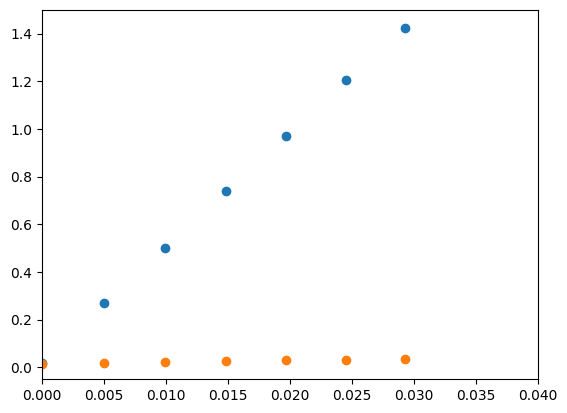

In [45]:
fig,ax = plt.subplots()
xs = [0, 2/400, 4/402, 6/404, 8/406, 10/408, 12/410]
ys_280 = prot599.iloc[280-190, 8:]
ys_313 = prot599.iloc[312-190, 8:]
ax.scatter(xs, ys_280)
ax.scatter(xs, ys_313)

plt.xlim([0, 0.04])
plt.ylim([-0.05, 1.5])
print(xs)

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
xs_re = np.array(xs).reshape(-1, 1)
reg_280 = LinearRegression().fit(xs_re, ys_280)
print(xs_re)
print(reg_280.score(xs_re, ys_280))
print(reg_280.intercept_)

ys_280_corr = ys_280 - reg_280.intercept_
prot_conc = ys_280_corr/11460*1000*1000
print(prot_conc)
factors = [400/2, 402/4, 404/6, 406/8, 408/10, 410/12]
prot_conc_stock = []
for i in range(6):
    prot_conc_stock.append(prot_conc[i+1]*factors[i])
print(prot_conc)
print(prot_conc_stock)
print(np.mean(prot_conc_stock[1:]))


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9999311693175621
0.023628449991735745
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
[4280.127848137247, 4188.756072575092, 4202.529150929301, 4185.836667923378, 4211.395663635705, 4178.412829706141]
4193.386076953922


[[0.        ]
 [0.005     ]
 [0.00995025]
 [0.01485149]
 [0.01970443]
 [0.0245098 ]
 [0.02926829]]
0.9971686956494948
0.013602636749548978
[0.77141415]


(-0.05, 0.1)

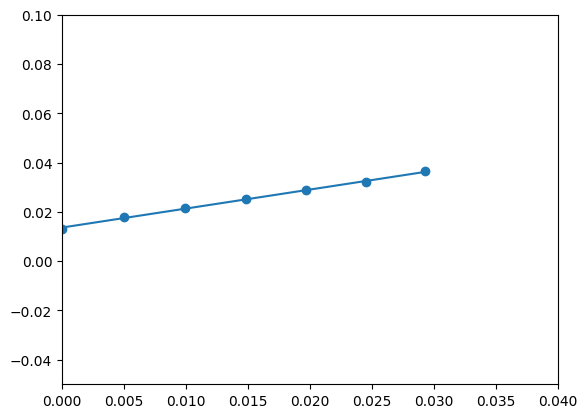

In [47]:
reg_313 = LinearRegression().fit(xs_re, ys_313)
print(xs_re)
print(reg_313.score(xs_re, ys_313))
print(reg_313.intercept_)
print(reg_313.coef_)


fig,ax = plt.subplots()
ys_313 = prot599.iloc[312-190, 8:]
ax.scatter(xs_re, ys_313)
ys_313_pred = np.array([reg_313.predict(np.array(xr).reshape(1, -1)) for xr in xs_re])

ax.plot(xs_re, ys_313_pred)
plt.xlim([0, 0.04])
plt.ylim([-0.05, 0.1])




TBS2             -0.434997
599_400_2.1      21.400639
599_402_4.1      41.679165
599_404_6.1      62.413799
599_406_8.1      82.479540
599_408_10.1    103.220482
599_410_12.1    122.295010
Name: 90, dtype: float64
TBS2            0.013021
599_400_2.1     0.018021
599_402_4.1     0.021347
599_404_6.1     0.025380
599_406_8.1     0.028822
599_408_10.1    0.031935
599_410_12.1    0.036367
Name: 122, dtype: float64
[0.00018399]
0.013602372397676343


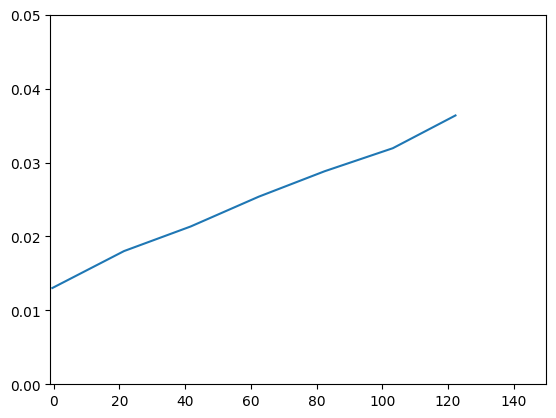

In [48]:
fig,ax = plt.subplots()
reg_prot_313_conc = LinearRegression().fit(np.array(prot_conc).reshape(-1, 1), ys_313)
print(prot_conc)
print(ys_313)
ax.plot(prot_conc, ys_313)
plt.xlim([-1, 150])
plt.ylim([0, 0.05])
print(reg_prot_313_conc.coef_)
print(reg_prot_313_conc.intercept_)

real_titri_ys-----------------------------------


(-0.01, 0.05)

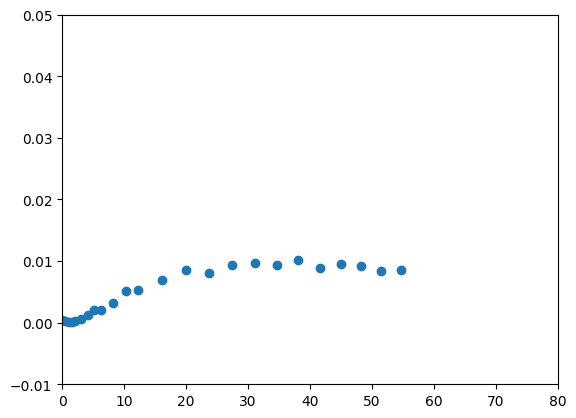

In [51]:
titri_adds = [0, 0.5, 1, 1.5, 2, 3, 4, 5, 6, 8, 10, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60]
#print('titri_adds-----------------------------------')
#print(titri_adds)
titri_vols = [z + 400 for z in titri_adds]
#print('titri_vols-----------------------------------')
#print(titri_vols)
prot_conc_xs = [titri_adds[i]*419.3/titri_vols[i] for i in range(len(titri_adds))]
prot_conc_ys = reg_prot_313_conc.predict(np.array(prot_conc_xs).reshape(-1, 1))

vel_titri_xs = np.array([4/x for x in titri_vols]).reshape(-1, 1)
#print('vel_titri_xs-----------------------------------')
#print(vel_titri_xs)

vel_titri_ys = vel_reg_313.predict(vel_titri_xs)
#print('vel_titri_ys-----------------------------------')
#print(vel_titri_ys)

real_titri_ys = data.iloc[312-190, 9:]
print('real_titri_ys-----------------------------------')
#print(real_titri_ys)

corr_titri_ys = abs(real_titri_ys - vel_titri_ys - prot_conc_ys)

corr_titri_ys = abs(real_titri_ys - vel_titri_ys)

fig,ax = plt.subplots()
ax.scatter(prot_conc_xs, corr_titri_ys)


plt.xlim([0, 80])
plt.ylim([-0.01, 0.05])


In [50]:
result = pd.DataFrame({'conc':prot_conc_xs, 'abs':corr_titri_ys.values})
result.to_csv(workdir + 'vel_nir_mef_Kd_UV/vel_nir_mef_Kd_UV_raw_data/vel_230408_processed.csv')

